## Using OpenForce toolkit to parameterize molecules with both AM1BCC and NAGL

In [3]:
# will need to add package nagl-models in addition to standard openff packages to run this.

In [4]:
from openff.toolkit import Molecule, Topology, ForceField
from openff.interchange import Interchange
from openff.units import unit, Quantity
from openff.toolkit.utils.toolkits import NAGLToolkitWrapper
import numpy as np
import time

Define a molecule via SMILES 1D representation

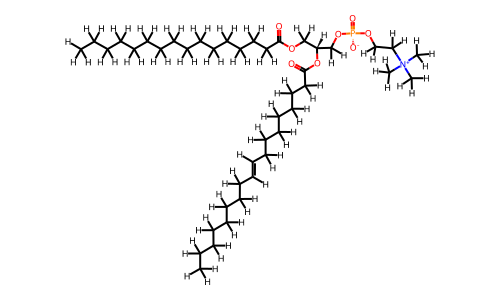

In [5]:
monomer = Molecule.from_smiles('CCCCCCCCCCCCCCCC(=O)OC[C@H](CO[P@](=O)([O-])OCC[N+](C)(C)C)OC(=O)CCCCCCC/C=C/CCCCCCCC')
monomer.visualize()

In [6]:
# assign a force field
sage = ForceField("openff-2.2.0.offxml")
cubic_box = unit.Quantity(50 * np.eye(3), unit.angstrom)

In [7]:
# use RDkit to generate a conformer
monomer.generate_conformers(n_conformers=1)

# create the internal representation
topology = Topology.from_molecules(monomer)

#### With NAGL

In [9]:
start = time.time()
NAGLToolkitWrapper().assign_partial_charges(monomer, 'openff-gnn-am1bcc-0.1.0-rc.3.pt')
# create the interchange object
solute_interchange = Interchange.from_smirnoff(topology=[monomer], 
                                                   force_field=sage, box = cubic_box, charge_from_molecules=[monomer])
end = time.time()
print(end-start)

0.92417311668396


In [10]:
# approximately minimize energy
solute_interchange.minimize()

# gromacs files
solute_interchange.to_gro('test_molecule_nagl.gro')
solute_interchange.to_top('test_molecule_nagl.top')

#### Without NAGL (using just AM1-BCC)

In [11]:
start = time.time()
# create the interchange object
solute_interchange = Interchange.from_smirnoff(topology=[monomer], 
                                                   force_field=sage, box = cubic_box)
end = time.time()
print(end-start)

750.2134990692139


In [13]:
# approximately minimize energy
solute_interchange.minimize()

# gromacs files
solute_interchange.to_gro('test_molecule_am1bcc.gro')
solute_interchange.to_top('test_molecule_am1bcc.top')